In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [6]:
model_name = "Qwen2-7B-Instruct"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [7]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   text                                                    3000 non-null   object
 1   label                                                   3000 non-null   object
 2   title                                                   3000 non-null   object
 3   puzzle                                                  3000 non-null   object
 4   truth                                                   3000 non-null   object
 5   Qwen/Qwen2-7B-Instruct_torch.float16_lf                 3000 non-null   object
 6   Qwen/Qwen2-7B-Instruct/checkpoint-35_torch.float16_lf   3000 non-null   object
 7   Qwen/Qwen2-7B-Instruct/checkpoint-70_torch.float16_lf   3000 non-null   object
 8   Qwen/Qwen2-7B-Instruct/checkpoint-105_torch.floa

In [8]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'Qwen/Qwen2-7B-Instruct_torch.float16_lf',
 'Qwen/Qwen2-7B-Instruct/checkpoint-35_torch.float16_lf',
 'Qwen/Qwen2-7B-Instruct/checkpoint-70_torch.float16_lf',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105_torch.float16_lf',
 'Qwen/Qwen2-7B-Instruct/checkpoint-140_torch.float16_lf',
 'Qwen/Qwen2-7B-Instruct/checkpoint-175_torch.float16_lf',
 'Qwen/Qwen2-7B-Instruct/checkpoint-210_torch.float16_lf',
 'Qwen/Qwen2-7B-Instruct/checkpoint-245_torch.float16_lf',
 'Qwen/Qwen2-7B-Instruct/checkpoint-280_torch.float16_lf',
 'Qwen/Qwen2-7B-Instruct/checkpoint-315_torch.float16_lf',
 'Qwen/Qwen2-7B-Instruct/checkpoint-350_torch.float16_lf',
 'Qwen/Qwen2-7B-Instruct/shots-00',
 'Qwen/Qwen2-7B-Instruct/shots-10']

In [9]:
perf_df = get_metrics_df(df)
perf_df

columns: ['Qwen/Qwen2-7B-Instruct_torch.float16_lf', 'Qwen/Qwen2-7B-Instruct/checkpoint-35_torch.float16_lf', 'Qwen/Qwen2-7B-Instruct/checkpoint-70_torch.float16_lf', 'Qwen/Qwen2-7B-Instruct/checkpoint-105_torch.float16_lf', 'Qwen/Qwen2-7B-Instruct/checkpoint-140_torch.float16_lf', 'Qwen/Qwen2-7B-Instruct/checkpoint-175_torch.float16_lf', 'Qwen/Qwen2-7B-Instruct/checkpoint-210_torch.float16_lf', 'Qwen/Qwen2-7B-Instruct/checkpoint-245_torch.float16_lf', 'Qwen/Qwen2-7B-Instruct/checkpoint-280_torch.float16_lf', 'Qwen/Qwen2-7B-Instruct/checkpoint-315_torch.float16_lf', 'Qwen/Qwen2-7B-Instruct/checkpoint-350_torch.float16_lf']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:453: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch              model  \
0     0.0  Qwen2-7B-Instruct   
1     0.2  Qwen2-7B-Instruct   
2     0.4  Qwen2-7B-Instruct   
3     0.6  Qwen2-7B-Instruct   
4     0.8  Qwen2-7B-Instruct   
5     1.0  Qwen2-7B-Instruct   
6     1.2  Qwen2-7B-Instruct   
7     1.4  Qwen2-7B-Instruct   
8     1.6  Qwen2-7B-Instruct   
9     1.8  Qwen2-7B-Instruct   
10    2.0  Qwen2-7B-Instruct   

                                                  run  accuracy  precision  \
0             Qwen/Qwen2-7B-Instruct_torch.float16_lf  0.683000   0.749310   
1   Qwen/Qwen2-7B-Instruct/checkpoint-35_torch.flo...  0.725000   0.784017   
2   Qwen/Qwen2-7B-Instruct/checkpoint-70_torch.flo...  0.759000   0.800530   
3   Qwen/Qwen2-7B-Instruct/checkpoint-105_torch.fl...  0.692667   0.803918   
4   Qwen/Qwen2-7B-Instruct/checkpoint-140_torch.fl...  0.725000   0.795272   
5   Qwen/Qwen2-7B-Instruct/checkpoint-175_torch.fl...  0.675667   0.781015   
6   Qwen/Qwen2-7B-Instruct/checkpoint-210_torch.fl...  0.701333   0.796956   
7   Qwen/Qwen2-7B-Instruct/checkpoint-245_torch.fl...  0.732667   0.792254   
8   Qwen/Qwen2-7B-Instruct/checkpoint-280_torch.fl...  0.698333   0.785127   
9   Qwen/Qwen2-7B-Instruct/checkpoint-315_torch.fl...  0.678333   0.785391   
10  Qwen/Qwen2-7B-Instruct/checkpoint-350_torch.fl...  0.689000   0.792972   

      recall        f1  ratio_valid_classifications  
0   0.683000  0.710140                     0.999667  
1   0.725000  0.748995                     0.999667  
2   0.759000  0.774875                     1.000000  
3   0.692667  0.733248                     1.000000  
4   0.725000  0.747624                     1.000000  
5   0.675667  0.708654                     1.000000  
6   0.701333  0.736268                     1.000000  
7   0.732667  0.755402                     0.999667  
8   0.698333  0.729225                     1.000000  
9   0.678333  0.716413                     1.000000  
10  0.689000  0.725999                     1.000000

0.0: Qwen/Qwen2-7B-Instruct_torch.float16_lf
0.2: Qwen/Qwen2-7B-Instruct/checkpoint-35_torch.float16_lf
0.4: Qwen/Qwen2-7B-Instruct/checkpoint-70_torch.float16_lf
0.6: Qwen/Qwen2-7B-Instruct/checkpoint-105_torch.float16_lf
0.8: Qwen/Qwen2-7B-Instruct/checkpoint-140_torch.float16_lf
1.0: Qwen/Qwen2-7B-Instruct/checkpoint-175_torch.float16_lf
1.2: Qwen/Qwen2-7B-Instruct/checkpoint-210_torch.float16_lf
1.4: Qwen/Qwen2-7B-Instruct/checkpoint-245_torch.float16_lf
1.6: Qwen/Qwen2-7B-Instruct/checkpoint-280_torch.float16_lf
1.8: Qwen/Qwen2-7B-Instruct/checkpoint-315_torch.float16_lf
2.0: Qwen/Qwen2-7B-Instruct/checkpoint-350_torch.float16_lf


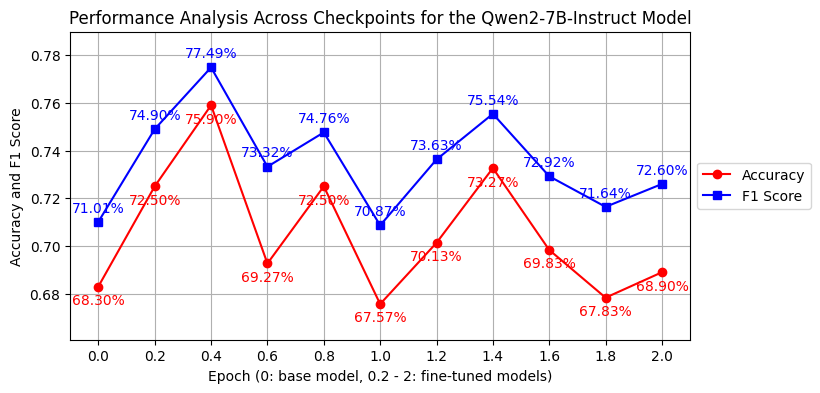

In [10]:
plot_metrics(perf_df, model_name)

In [11]:
perf_df.to_csv(metrics_csv, index=False)

In [12]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['Qwen/Qwen2-7B-Instruct/shots-00', 'Qwen/Qwen2-7B-Instruct/shots-10']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:453: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


shots              model                              run  accuracy  \
0     0  Qwen2-7B-Instruct  Qwen/Qwen2-7B-Instruct/shots-00  0.683000   
1    10  Qwen2-7B-Instruct  Qwen/Qwen2-7B-Instruct/shots-10  0.564667   

   precision    recall        f1  ratio_valid_classifications  
0    0.74931  0.683000  0.710140                     0.999667  
1    0.73912  0.564667  0.606405                     0.989667

0: Qwen/Qwen2-7B-Instruct/shots-00
10: Qwen/Qwen2-7B-Instruct/shots-10


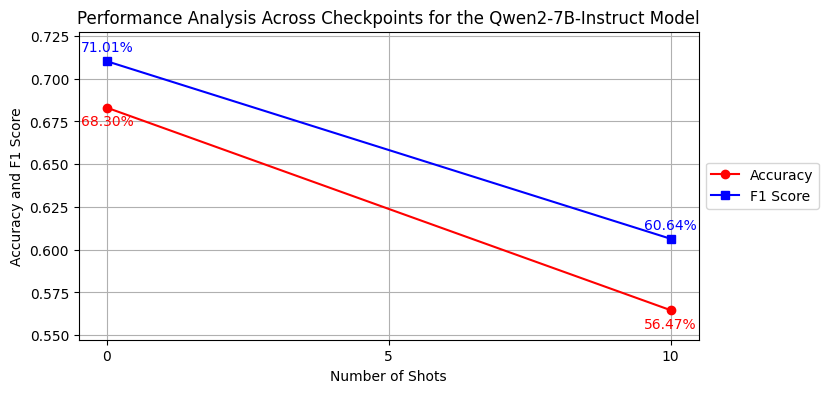

In [13]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [14]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** Qwen/Qwen2-7B-Instruct_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct_torch.float16_lf
不是      1427
是       1050
不重要      286
回答正确     137
问法错误      99
石头上。       1
Name: count, dtype: int64


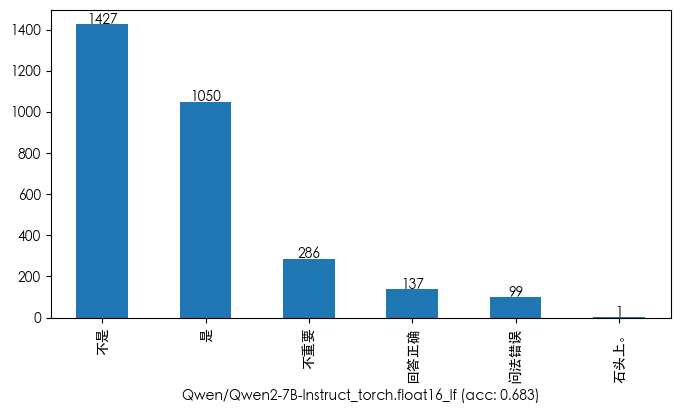

********** Qwen/Qwen2-7B-Instruct/checkpoint-35_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-35_torch.float16_lf
不是      1353
是       1160
不重要      392
问法错误      63
回答正确      31
卖钱         1
Name: count, dtype: int64


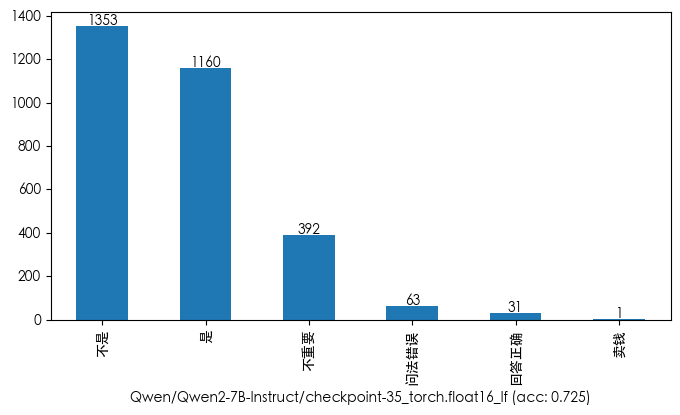

********** Qwen/Qwen2-7B-Instruct/checkpoint-70_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-70_torch.float16_lf
不是      1473
是       1113
不重要      351
回答正确      34
问法错误      29
Name: count, dtype: int64


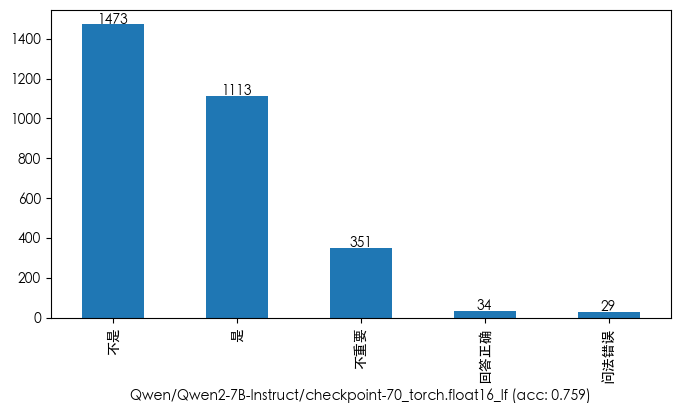

********** Qwen/Qwen2-7B-Instruct/checkpoint-105_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-105_torch.float16_lf
不是      1371
是        940
不重要      603
问法错误      53
回答正确      33
Name: count, dtype: int64


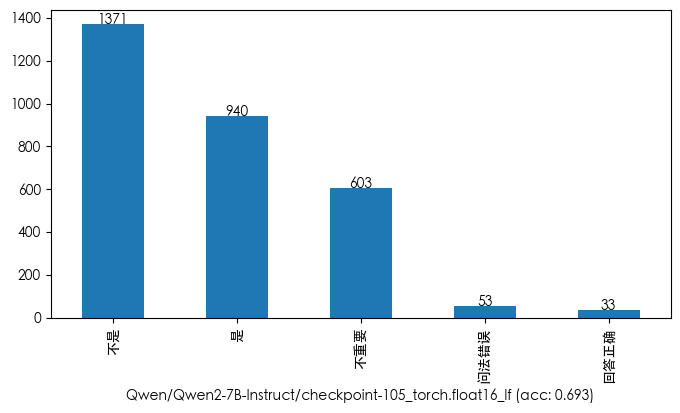

********** Qwen/Qwen2-7B-Instruct/checkpoint-140_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-140_torch.float16_lf
不是      1568
是        911
不重要      432
问法错误      46
回答正确      43
Name: count, dtype: int64


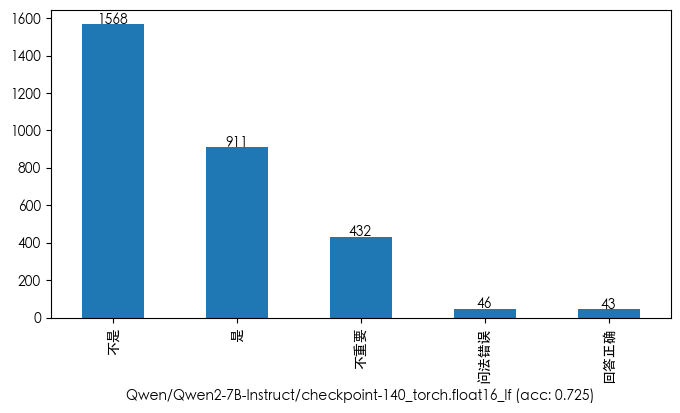

********** Qwen/Qwen2-7B-Instruct/checkpoint-175_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-175_torch.float16_lf
不是      1547
是        815
不重要      560
回答正确      39
问法错误      39
Name: count, dtype: int64


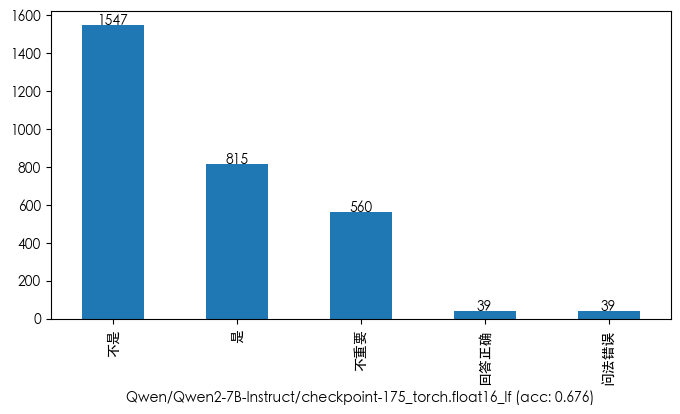

********** Qwen/Qwen2-7B-Instruct/checkpoint-210_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-210_torch.float16_lf
不是      1434
是        934
不重要      479
问法错误     117
回答正确      36
Name: count, dtype: int64


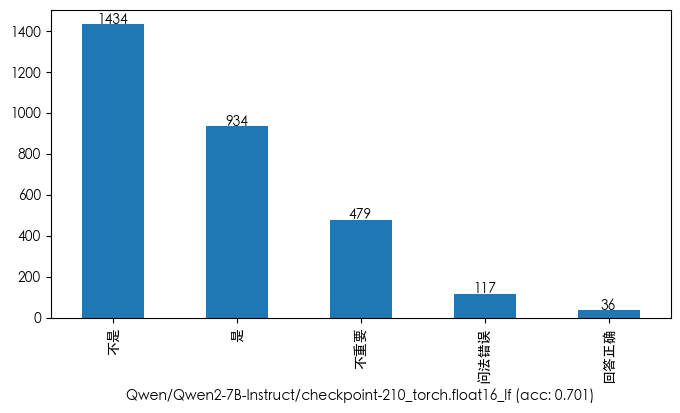

********** Qwen/Qwen2-7B-Instruct/checkpoint-245_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-245_torch.float16_lf
不是      1501
是       1013
不重要      353
问法错误      98
回答正确      34
男          1
Name: count, dtype: int64


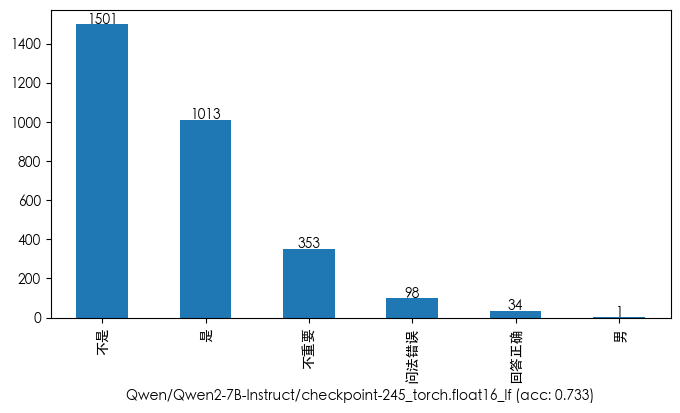

********** Qwen/Qwen2-7B-Instruct/checkpoint-280_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-280_torch.float16_lf
不是      1483
是        926
不重要      483
问法错误      77
回答正确      31
Name: count, dtype: int64


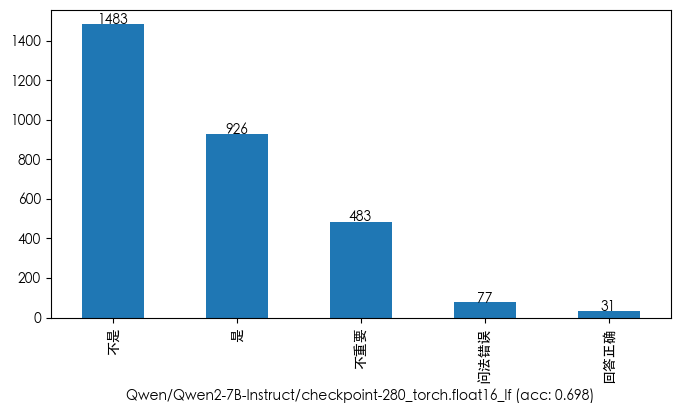

********** Qwen/Qwen2-7B-Instruct/checkpoint-315_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-315_torch.float16_lf
不是      1420
是        901
不重要      561
问法错误      84
回答正确      34
Name: count, dtype: int64


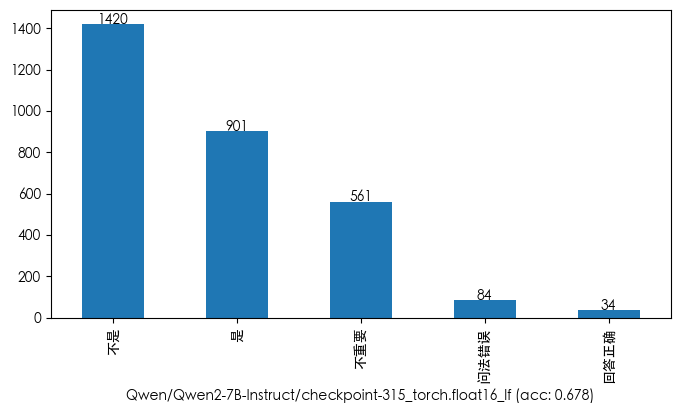

********** Qwen/Qwen2-7B-Instruct/checkpoint-350_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-350_torch.float16_lf
不是      1412
是        919
不重要      561
问法错误      74
回答正确      34
Name: count, dtype: int64


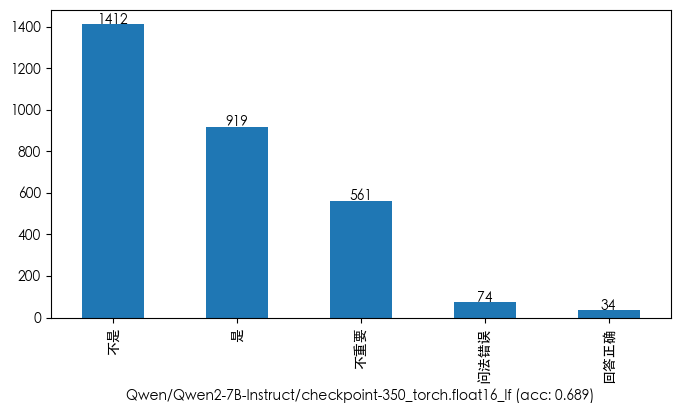

In [15]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** Qwen/Qwen2-7B-Instruct_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct_torch.float16_lf
不是      1427
是       1050
不重要      286
回答正确     137
问法错误      99
石头上。       1
Name: count, dtype: int64


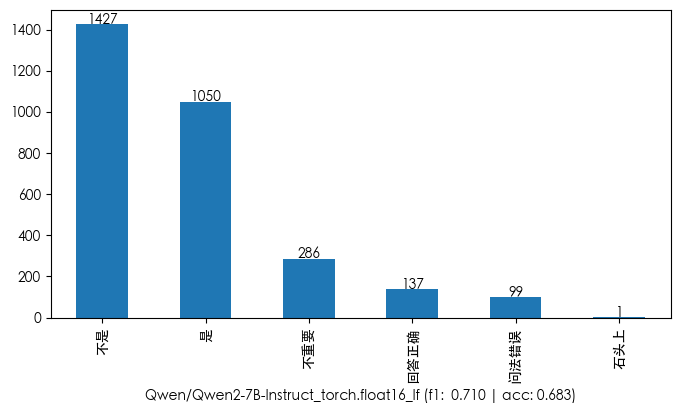

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:595: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


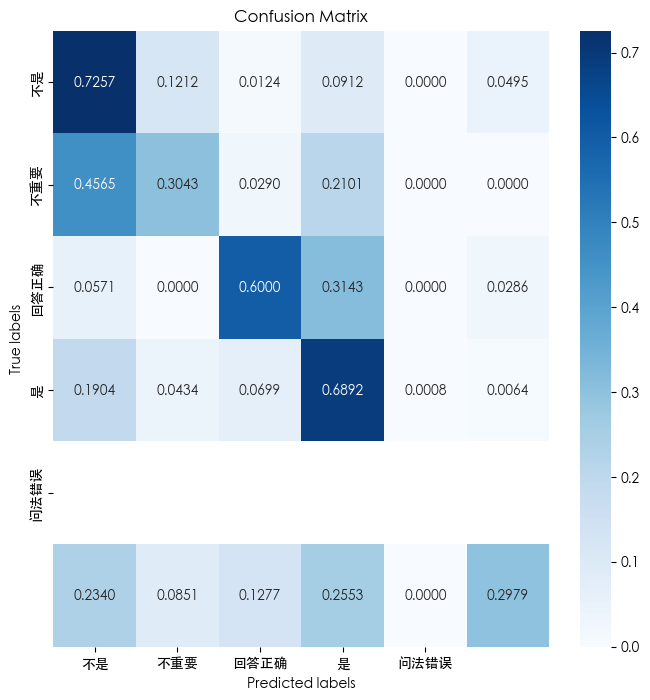

********** Qwen/Qwen2-7B-Instruct/checkpoint-35_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-35_torch.float16_lf
不是      1353
是       1160
不重要      392
问法错误      63
回答正确      31
卖钱         1
Name: count, dtype: int64


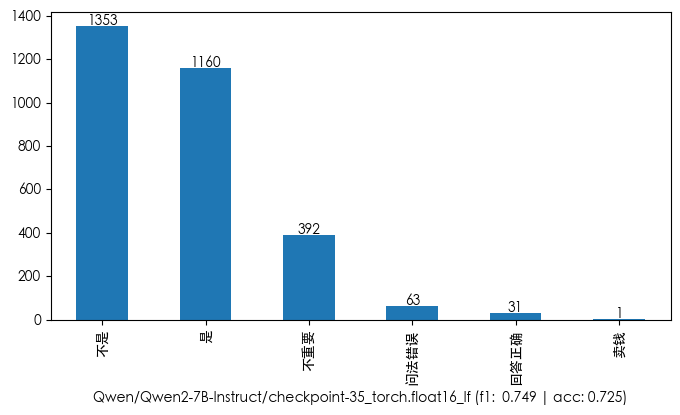

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:595: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


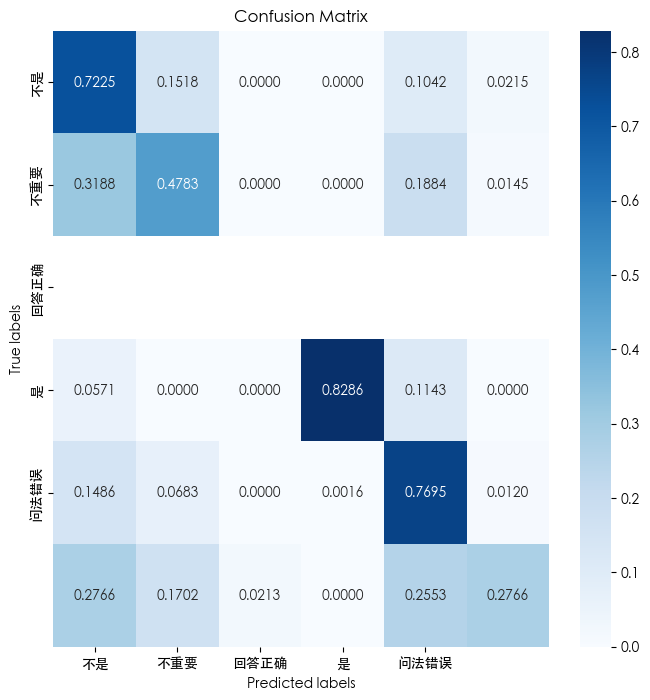

********** Qwen/Qwen2-7B-Instruct/checkpoint-70_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-70_torch.float16_lf
不是      1473
是       1113
不重要      351
回答正确      34
问法错误      29
Name: count, dtype: int64


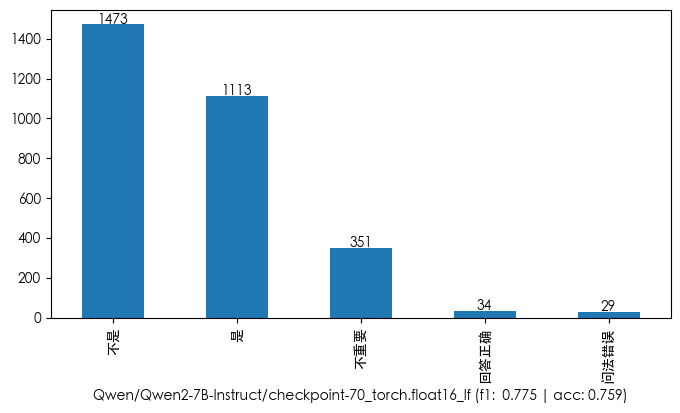

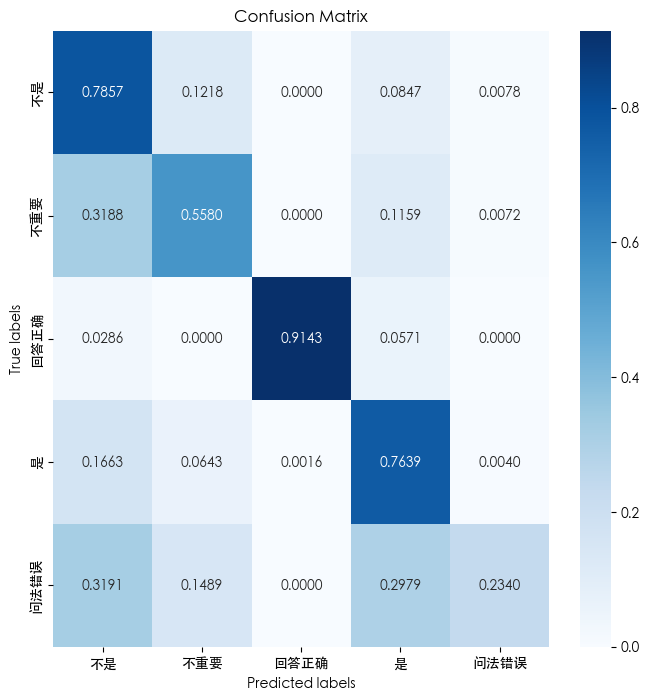

********** Qwen/Qwen2-7B-Instruct/checkpoint-105_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-105_torch.float16_lf
不是      1371
是        940
不重要      603
问法错误      53
回答正确      33
Name: count, dtype: int64


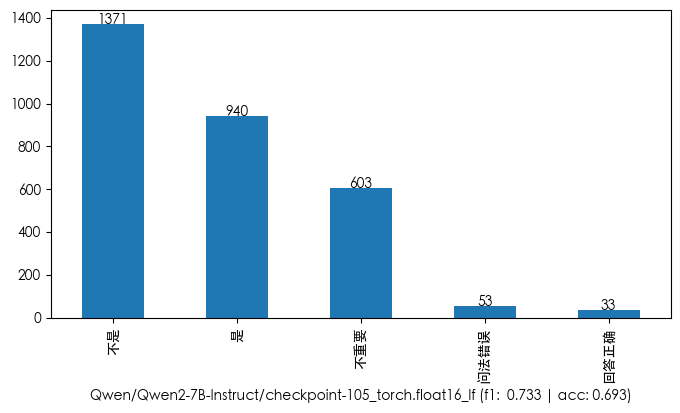

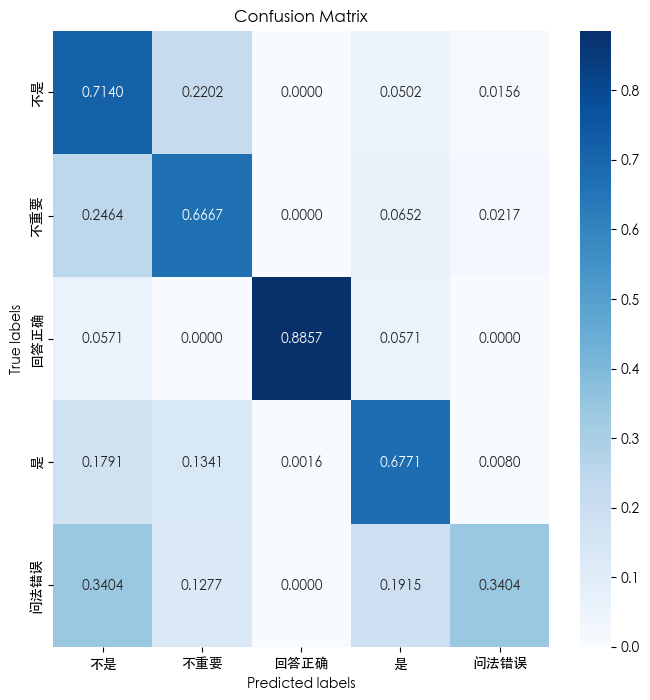

********** Qwen/Qwen2-7B-Instruct/checkpoint-140_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-140_torch.float16_lf
不是      1568
是        911
不重要      432
问法错误      46
回答正确      43
Name: count, dtype: int64


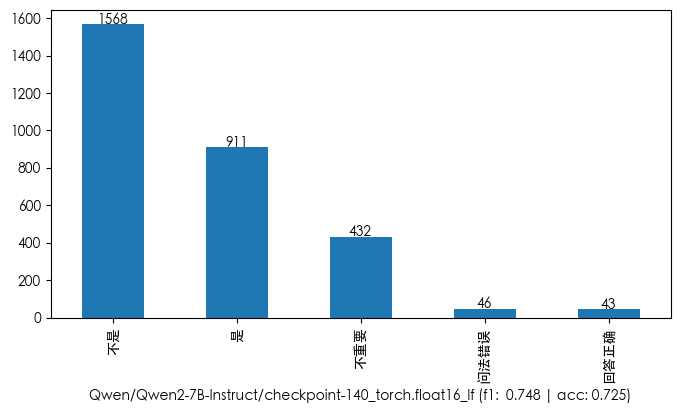

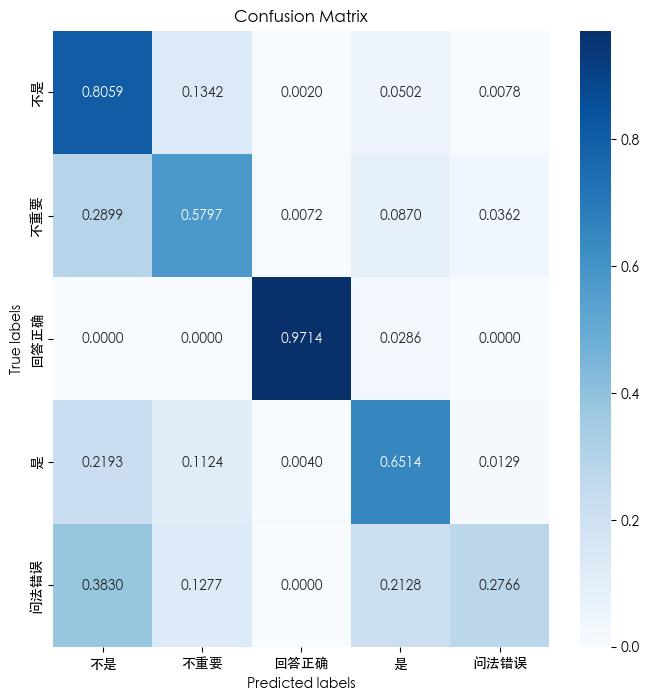

********** Qwen/Qwen2-7B-Instruct/checkpoint-175_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-175_torch.float16_lf
不是      1547
是        815
不重要      560
回答正确      39
问法错误      39
Name: count, dtype: int64


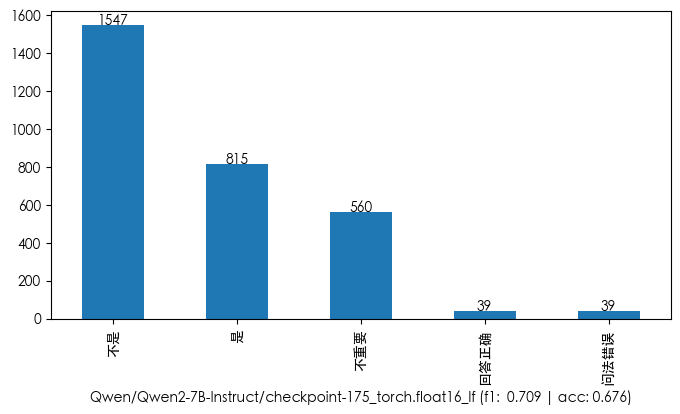

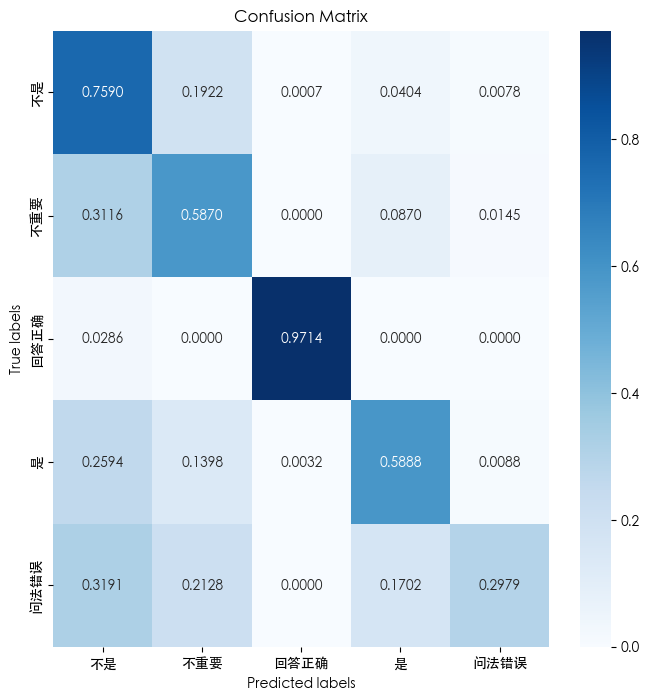

********** Qwen/Qwen2-7B-Instruct/checkpoint-210_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-210_torch.float16_lf
不是      1434
是        934
不重要      479
问法错误     117
回答正确      36
Name: count, dtype: int64


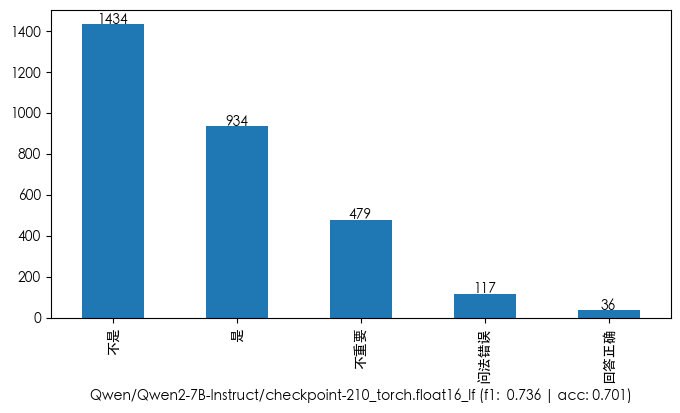

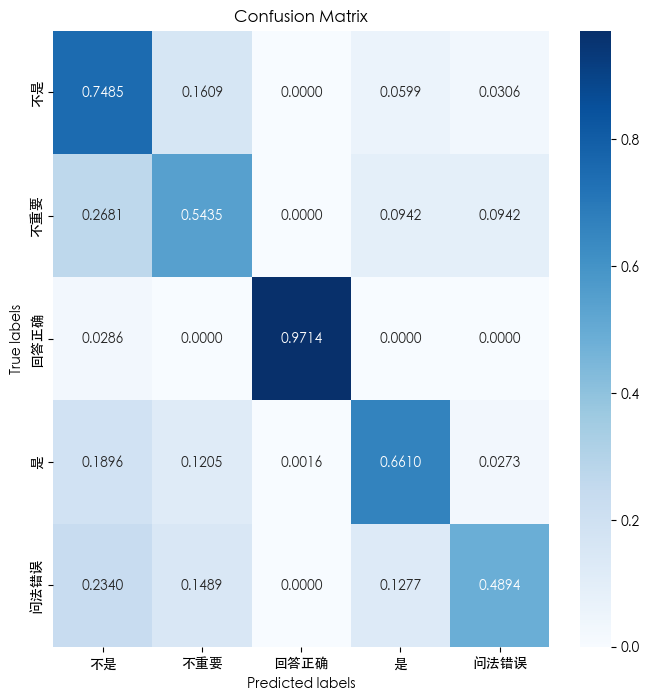

********** Qwen/Qwen2-7B-Instruct/checkpoint-245_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-245_torch.float16_lf
不是      1501
是       1013
不重要      353
问法错误      98
回答正确      34
男          1
Name: count, dtype: int64


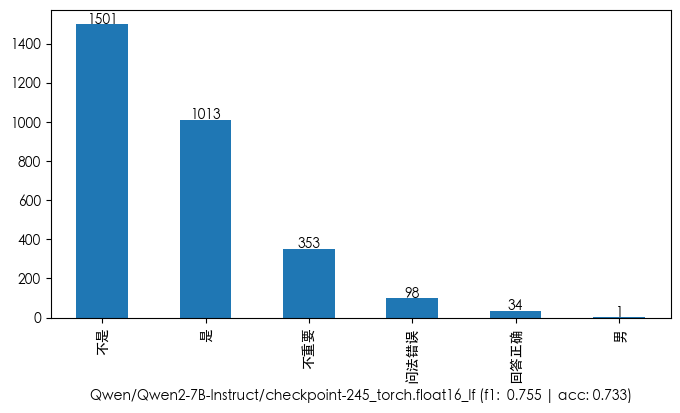

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:595: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


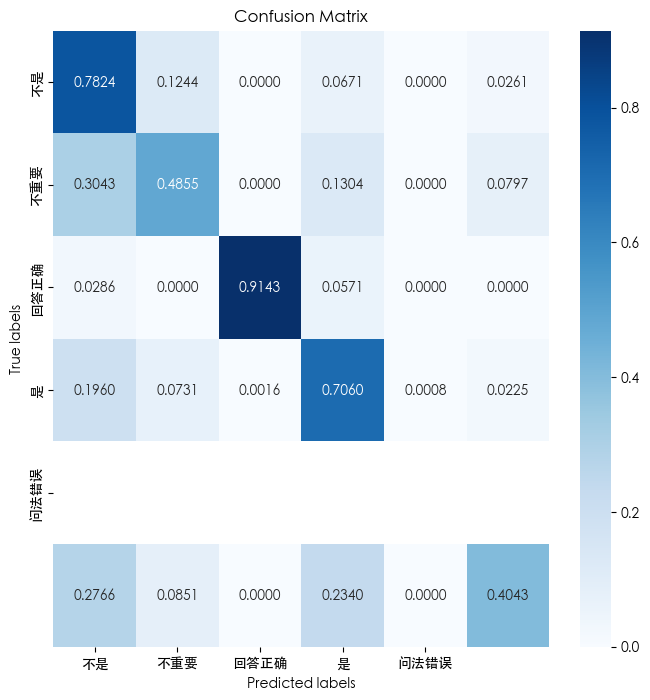

********** Qwen/Qwen2-7B-Instruct/checkpoint-280_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-280_torch.float16_lf
不是      1483
是        926
不重要      483
问法错误      77
回答正确      31
Name: count, dtype: int64


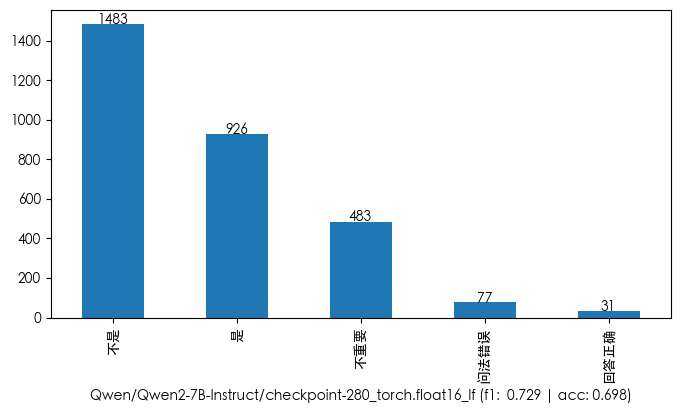

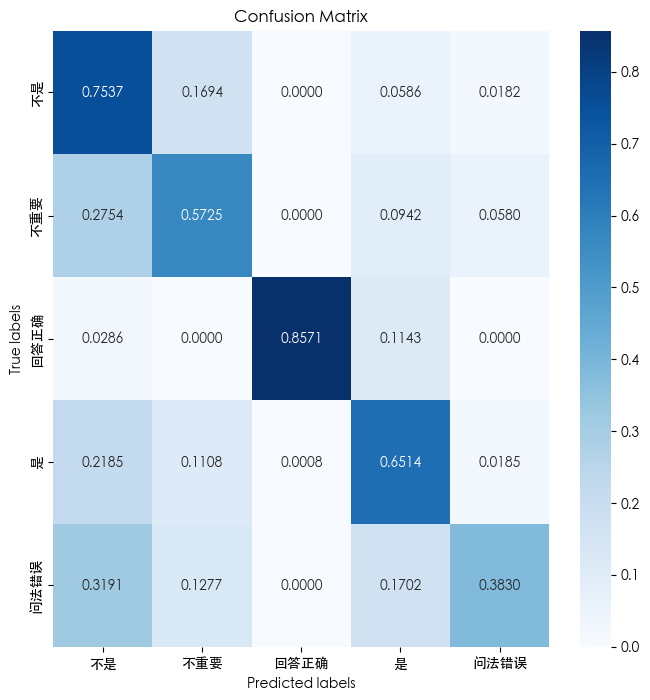

********** Qwen/Qwen2-7B-Instruct/checkpoint-315_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-315_torch.float16_lf
不是      1420
是        901
不重要      561
问法错误      84
回答正确      34
Name: count, dtype: int64


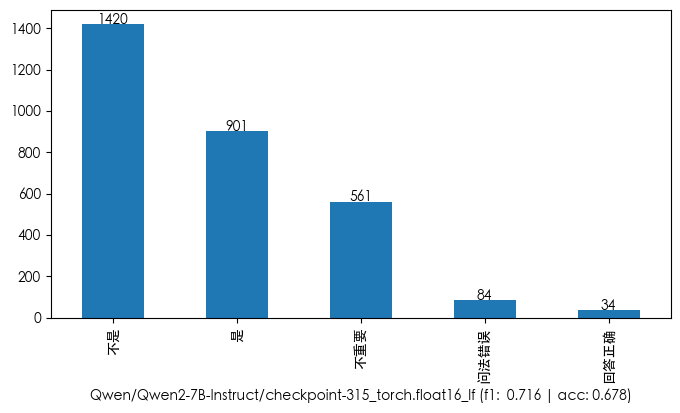

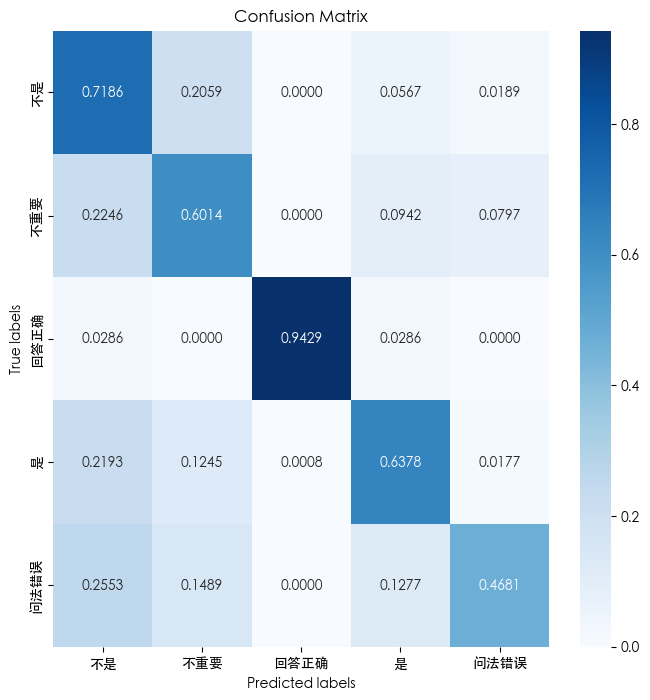

********** Qwen/Qwen2-7B-Instruct/checkpoint-350_torch.float16_lf **********
Qwen/Qwen2-7B-Instruct/checkpoint-350_torch.float16_lf
不是      1412
是        919
不重要      561
问法错误      74
回答正确      34
Name: count, dtype: int64


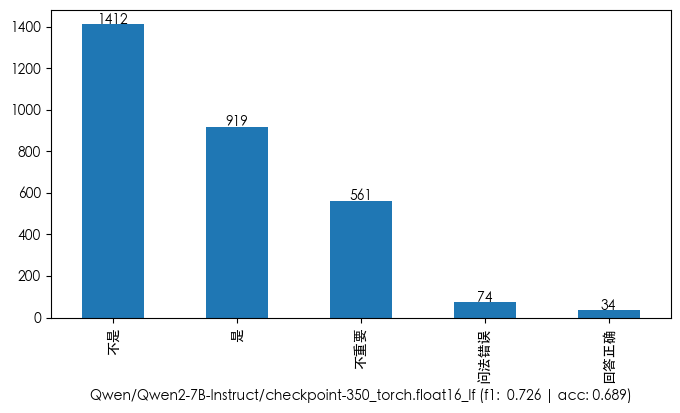

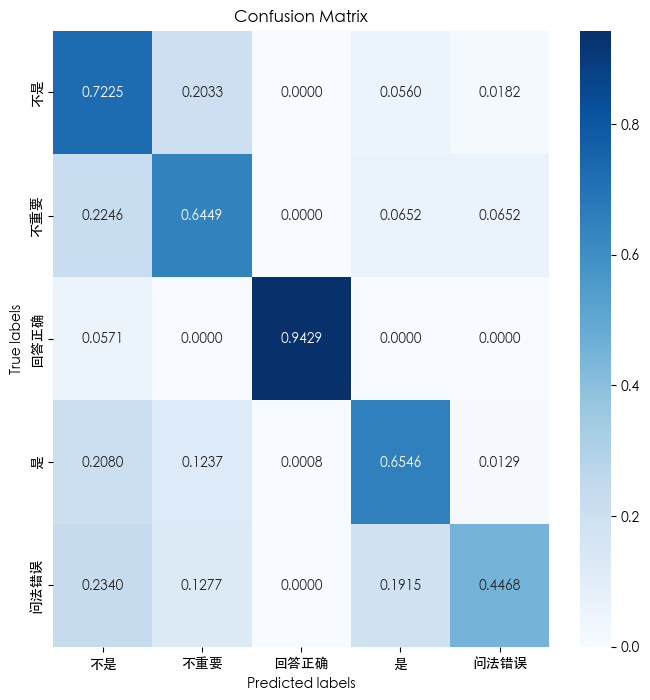

In [16]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )

********** Qwen/Qwen2-7B-Instruct/shots-00 **********
Qwen/Qwen2-7B-Instruct/shots-00
不是      1427
是       1050
不重要      286
回答正确     137
问法错误      99
石头上。       1
Name: count, dtype: int64


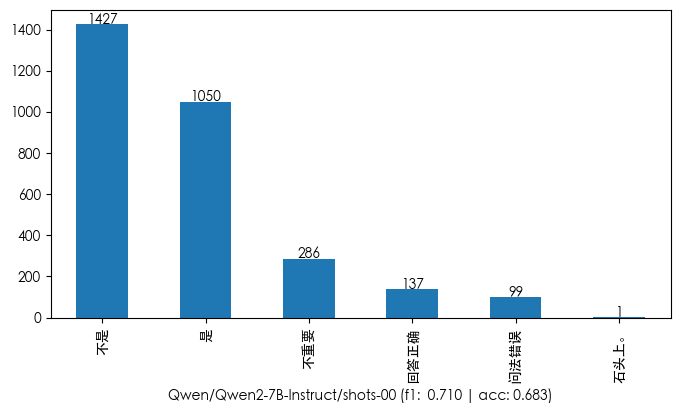

********** Qwen/Qwen2-7B-Instruct/shots-10 **********
Qwen/Qwen2-7B-Instruct/shots-10
不是                           1495
是                             534
回答正确                          451
不重要                           446
问法错误                           43
回答: 是                          17
回答: 不是                          4
回答: 回答正确                        4
回答: 不重要                         4
参与者提出的问题: 背包的主人\n回答: 回答正确       1
重要                              1
Name: count, dtype: int64


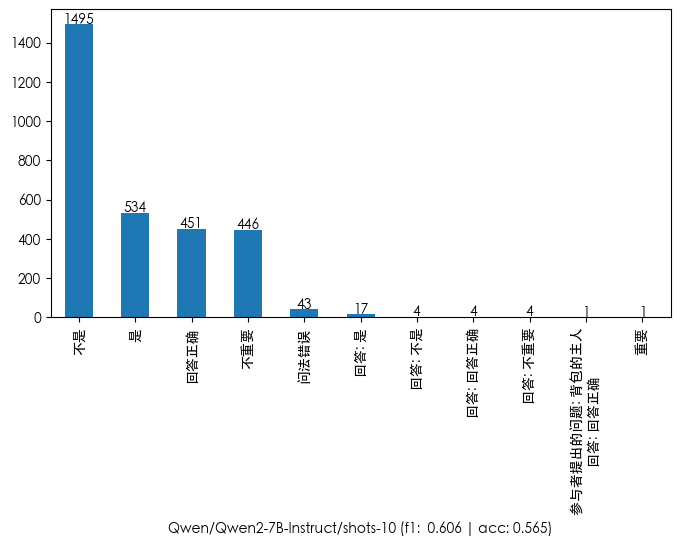

In [17]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
    )

********** Qwen/Qwen2-7B-Instruct/shots-00 **********
Qwen/Qwen2-7B-Instruct/shots-00
不是      1427
是       1050
不重要      286
回答正确     137
问法错误      99
石头上。       1
Name: count, dtype: int64


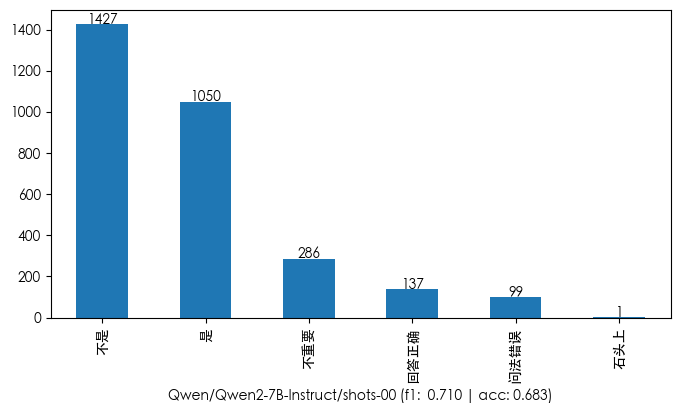

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:595: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


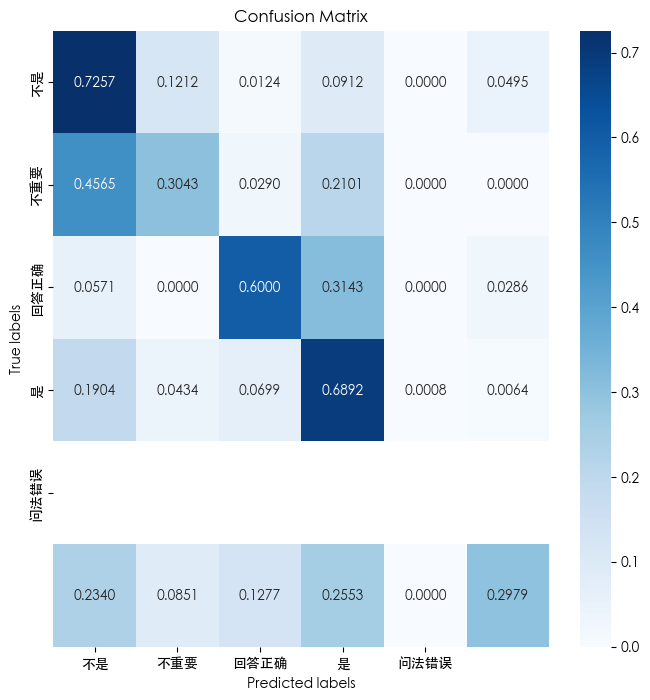

********** Qwen/Qwen2-7B-Instruct/shots-10 **********
Qwen/Qwen2-7B-Instruct/shots-10
不是                           1495
是                             534
回答正确                          451
不重要                           446
问法错误                           43
回答: 是                          17
回答: 不是                          4
回答: 回答正确                        4
回答: 不重要                         4
参与者提出的问题: 背包的主人\n回答: 回答正确       1
重要                              1
Name: count, dtype: int64


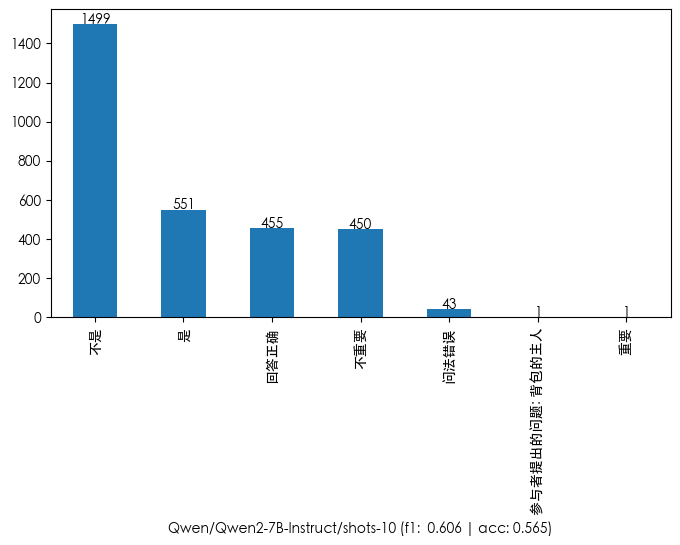

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:595: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


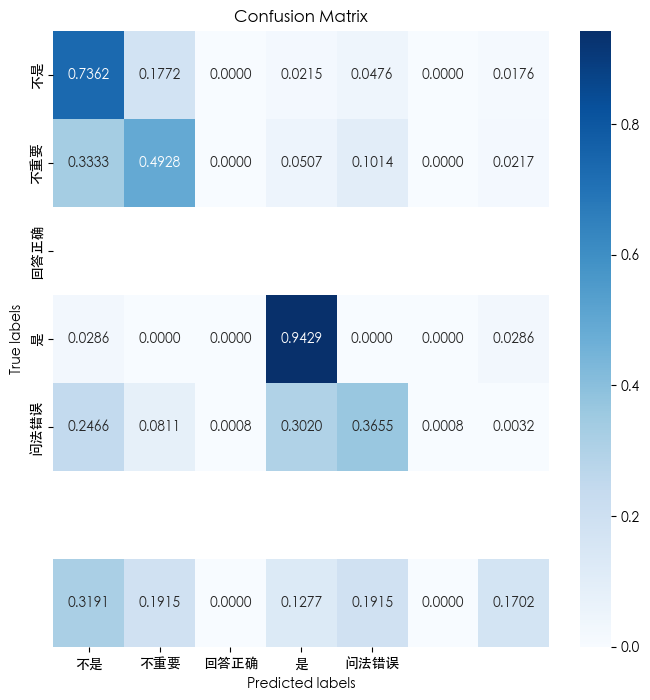

In [18]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )